# Feature Engineering and Modelling

1. Import packages
2. Load data
3. Modelling

## 1. Import packages

In [16]:
import warnings
warnings.filterwarnings ("ignore", category=FutureWarning)

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import sklearn

## 2. Load data

In [18]:
df = pd.read_csv('./data_for_predictions.csv')
df.drop(columns=["Unnamed: 0"], inplace=True)

In [19]:
df.head()

,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,...,months_modif_prod,months_renewal,channel_MISSING,channel_ewpakwlliwisiwduibdlfmalxowmwpci,channel_foosdfpfkusacimwkcsosbicdxkicaua,channel_lmkebamcaaclubfxadlmueccxoimlema,channel_usilxuppasemubllopkaafesmlibmsdf,origin_up_kamkkxfxxuwbdslkwifmmcsiusiuosws,origin_up_ldkssxwpmemidmecebumciepifcamkci,origin_up_lxidpiddsbxsbosboudacockeimpuepw
0,24011ae4ebbe3035111d65fa7c15bc57,0.000000,4.739944,0.000000,0.000000,0.0,0.444045,0.114481,0.098142,40.606701,...,2,6,0,0,1,0,0,0,0,1
1,d29c2c54acc38ff3c0614d0a653813dd,3.668479,0.000000,0.000000,2.280920,0.0,1.237292,0.145711,0.000000,44.311378,...,76,4,1,0,0,0,0,1,0,0
2,764c75f661154dac3a6c254cd082ea7d,2.736397,0.000000,0.000000,1.689841,0.0,1.599009,0.165794,0.087899,44.311378,...,68,8,0,0,1,0,0,1,0,0
3,bba03439a292a1e166f80264c16191cb,3.200029,0.000000,0.000000,2.382089,0.0,1.318689,0.146694,0.000000,44.311378,...,69,9,0,0,0,1,0,1,0,0
4,149d57cf92fc41cf94415803a877cb4b,3.646011,0.000000,2.721811,2.650065,0.0,2.122969,0.116900,0.100015,40.606701,...,71,9,1,0,0,0,0,1,0,0


## 3. Modelling

The dataset has been prepared with optimized features. We will train a Random Forest classifier to generate accurate predictions. This model is chosen for its ability to handle complex data and reduce overfitting, ensuring reliable results.

In [20]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

### Data sampling

We split the dataset into 75% for training and 25% for testing to check how well the model works on new data. This helps us make sure the predictions are accurate and reliable.

In [21]:
# Make a copy of our data
train_df = df.copy()

# Separate target variable from independent variables
y = df['churn']
X = df.drop(columns=['id', 'churn'])
print(X.shape)
print(y.shape)

(14606, 61)
(14606,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10954, 61)
(10954,)
(3652, 61)
(3652,)


### Model training

The Random Forest classifier is a powerful predictive model because it combines multiple Decision Trees instead of relying on just one. This approach improves accuracy and reduces errors by learning different patterns from the data.

Why Random Forest?
1. More reliable predictions by averaging multiple decision trees
2. Works well with complex, non-linear data
3. No need for feature scaling

Things to Consider:
1. Requires more computational power due to multiple trees
2. Training time can be longer for large datasets

Overall, Random Forest provides strong and stable predictions, making it a great choice for data-driven decision-making. 

In [25]:
rfc_model = RandomForestClassifier(n_estimators=1000)
rfc_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

## Evaluation

To measure how well the model works, we use Accuracy, Precision, and Recall:

1. Accuracy: How many predictions are correct overall.
2. Precision: Makes sure the model doesn’t wrongly label something as positive.
3. Recall: Makes sure the model doesn’t miss important positive cases.

Relying only on accuracy can be misleading, especially in critical situations. Precision and Recall help ensure better and more reliable predictions.

In [26]:
# Evaluate the model
predictions = rfc_model.predict(X_test)
tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions).ravel()

In [27]:
y_test.value_counts()

churn
0    3286
1     366
Name: count, dtype: int64

In [14]:
print(f"True positives: {tp}")
print(f"False positives: {fp}")
print(f"True negatives: {tn}")
print(f"False negatives: {fn}\n")

print(f"Accuracy: {metrics.accuracy_score(y_test, predictions)}")
print(f"Precision: {metrics.precision_score(y_test, predictions)}")
print(f"Recall: {metrics.recall_score(y_test, predictions)}")

True positives: 19
False positives: 5
True negatives: 3281
False negatives: 347

Accuracy: 0.9036144578313253
Precision: 0.7916666666666666
Recall: 0.05191256830601093


Looking at these results there are a few things to point out:

- Within the test set about 10% of the rows are churners (churn = 1).
- Looking at the true negatives, we have 3281 out of 3286. This means that out of all the negative cases (churn = 0), we predicted 3282 as negative (hence the name True negative). This is great!
- Looking at the false negatives, this is where we have predicted a client to not churn (churn = 0) when in fact they did churn (churn = 1). This number is quite high at 347, we want to get the false negatives to as close to 0 as we can, so this would need to be addressed when improving the model.
- Looking at false positives, this is where we have predicted a client to churn when they actually didnt churn. For this value we can see there are 4 cases, which is great!
- With the true positives, we can see that in total we have 366 clients that churned in the test dataset. However, we are only able to correctly identify 18 of those 366, which is very poor.
- Looking at the accuracy score, this is very misleading! Hence the use of precision and recall is important. The accuracy score is high, but it does not tell us the whole story.
- Looking at the precision score, this shows us a score of 0.79 which is not bad, but could be improved.
- However, the recall shows us that the classifier has a very poor ability to identify positive samples. This would be the main concern for improving this model!

So overall, we're able to very accurately identify clients that do not churn, but we are not able to predict cases where clients do churn! What we are seeing is that a high % of clients are being identified as not churning when they should be identified as churning. This in turn tells me that the current set of features are not discriminative enough to clearly distinguish between churners and non-churners. 

To improve, we need to enhance the dataset with better features and fine-tune the model parameters to better predict customer churn. 

## Model understanding

In [29]:
feature_importances = pd.DataFrame({
    'features': X_train.columns,
    'importance': rfc_model.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

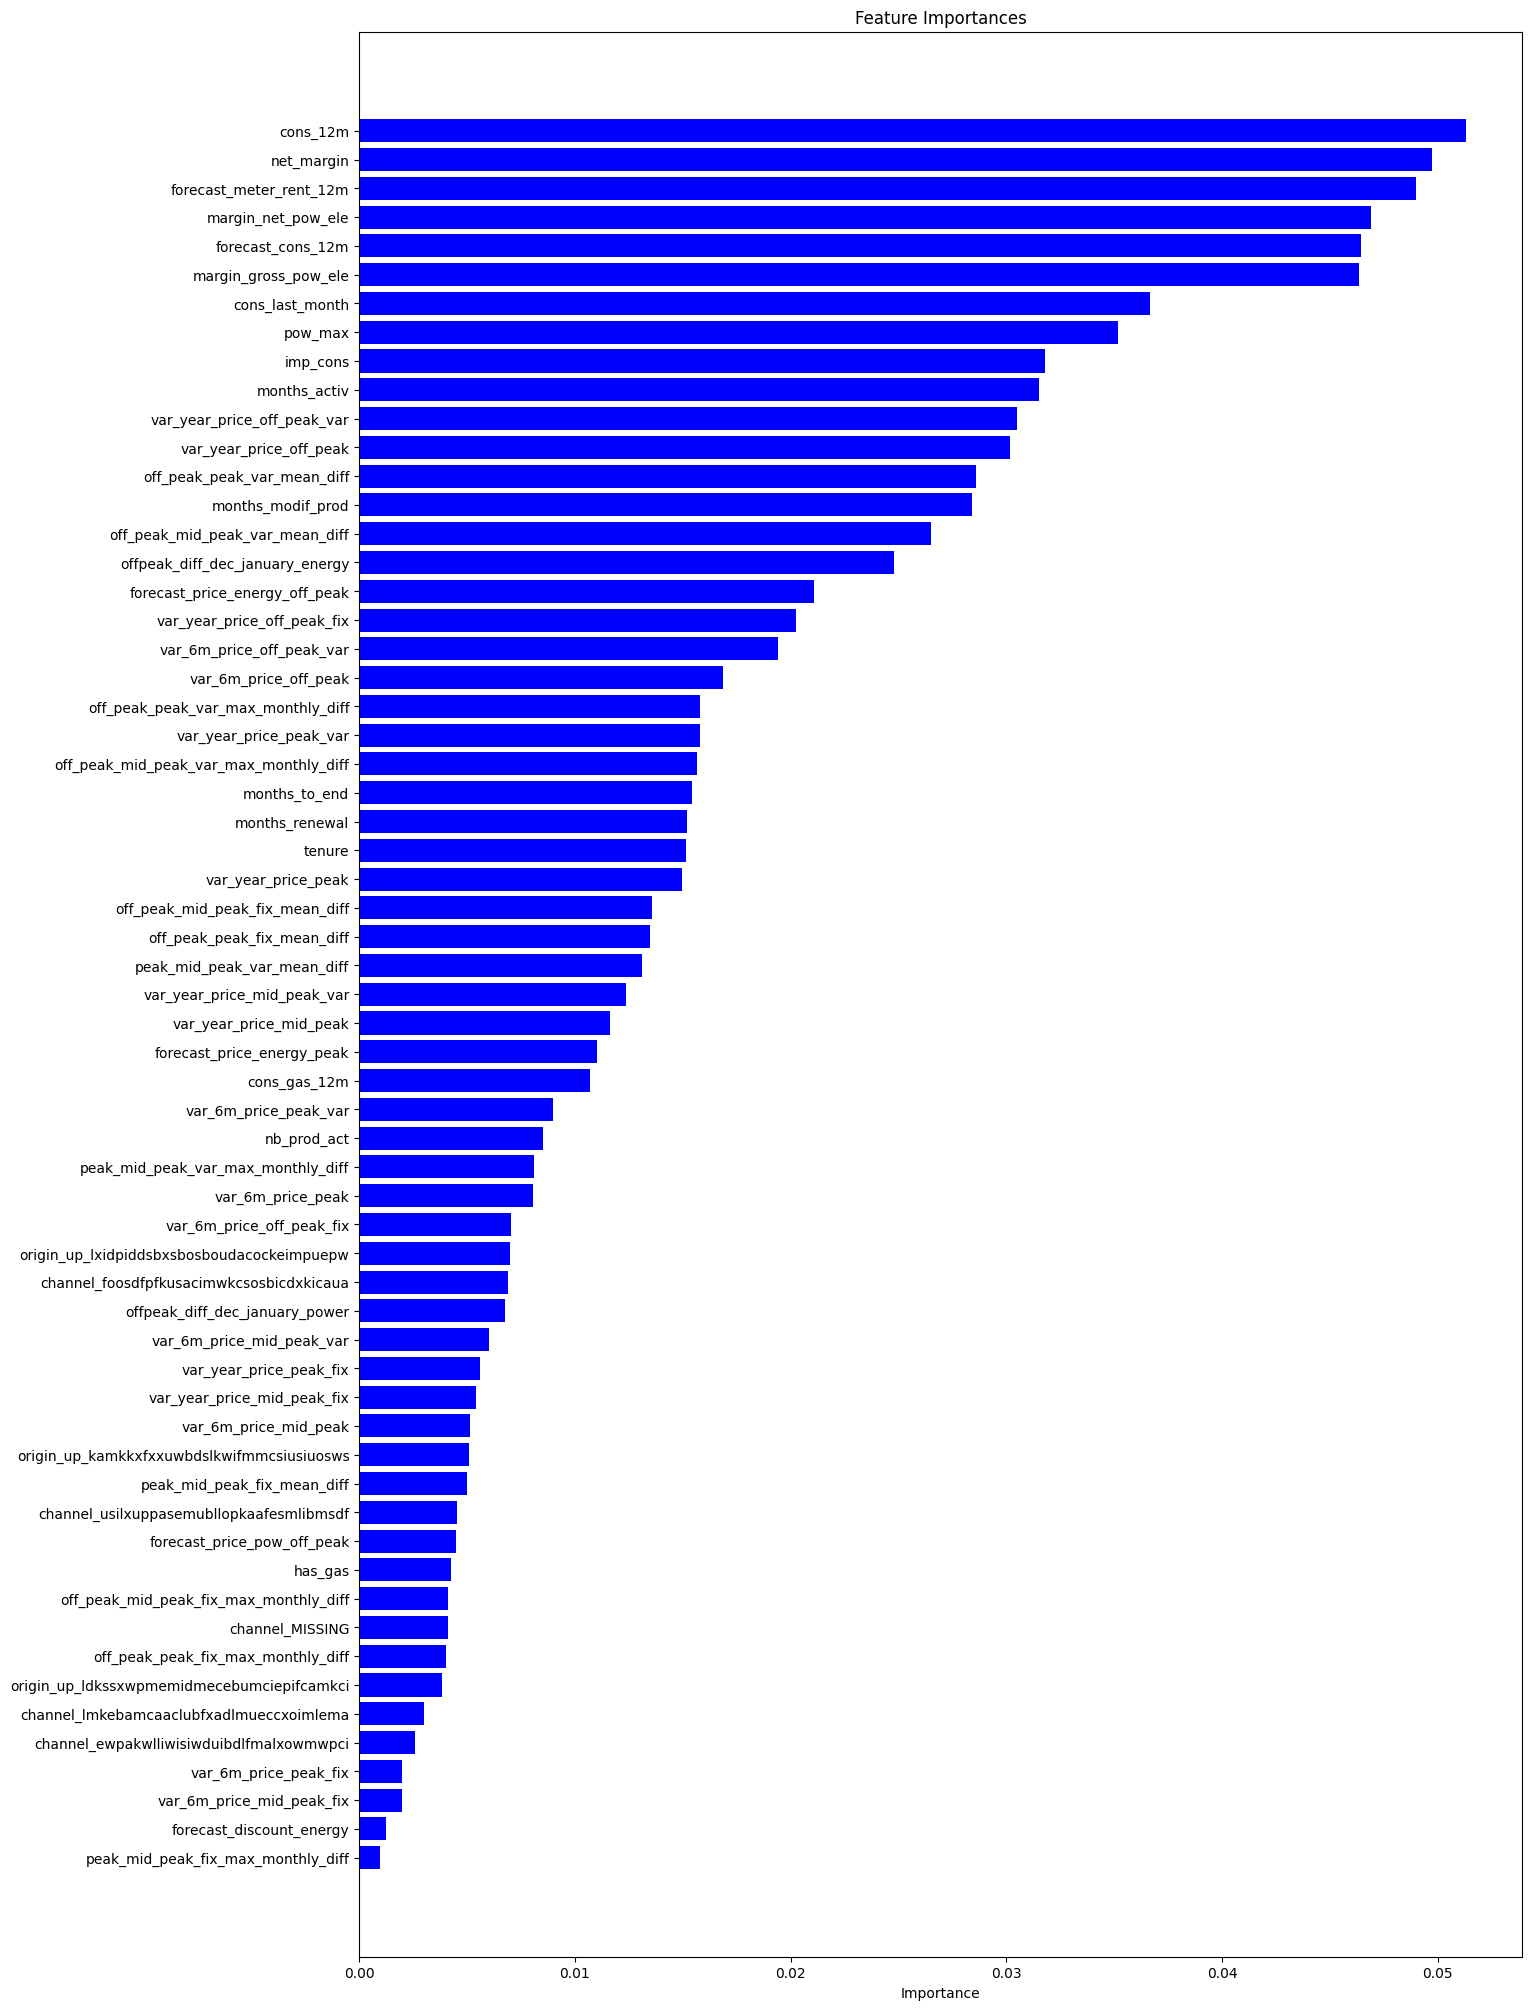

In [30]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

Our analysis shows that `net margin` and `energy consumption over 12 months` are the biggest factors influencing customer churn. `Subscription margin` and `contract duration` also play a significant role. Interestingly, while `price sensitivity` does contribute, it’s not the main reason customers leave. To reduce churn, we should focus more on customer engagement and contract strategies rather than just adjusting prices. Further analysis is needed to confirm this.

In [32]:
proba_predictions = rfc_model.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [33]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

In [34]:
X_test['churn'] = predictions.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('out_of_sample_data_with_predictions.csv')

In [35]:
import IPython
IPython.display.FileLink('out_of_sample_data_with_predictions.csv')

C:\Users\Asus\out_of_sample_data_with_predictions.csv